## The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`).

## Preparation

* Create the target variable by mapping `yes` to 1 and `no` to 0. 
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/2022w4.csv")

In [3]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
data.card.value_counts()

card
yes    1023
no      296
Name: count, dtype: int64

In [5]:
# data['card'] = data['card'].apply(lambda x : 1 if x == 'yes' else 0)
mapping = {'yes': 1, 'no': 0}
data['card'] = data['card'].map(mapping)

In [6]:
data.card.value_counts()

card
1    1023
0     296
Name: count, dtype: int64

In [7]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [8]:
from sklearn.model_selection import train_test_split

df_X_train_full, df_X_test = train_test_split(data, random_state=1, test_size= 0.2)
df_X_train, df_X_val = train_test_split(df_X_train_full, random_state=1, test_size= 0.25)

print(f"df_X_train_full:  {df_X_train_full.shape} ,  df_X_test: {df_X_test.shape}")
print(f"df_X_train:  {df_X_train.shape} ,  df_X_val: {df_X_val.shape}")

df_X_train_full:  (1055, 12) ,  df_X_test: (264, 12)
df_X_train:  (791, 12) ,  df_X_val: (264, 12)


In [9]:
df_X_train.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1105,0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
431,0,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
407,1,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
1217,1,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
1133,1,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [10]:
df_X_train = df_X_train.reset_index(drop=True)
df_X_val = df_X_val.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)

In [11]:
df_y_train = df_X_train['card']
df_y_val = df_X_val['card']
df_y_test = df_X_test['card']

In [12]:
del df_X_train['card']
del df_X_val['card']
del df_X_test['card']

In [13]:
df_X_train.dtypes

reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [14]:
numerical_feature = df_X_train.select_dtypes(include=["int64", "float64"]).columns.to_list()
categorical_feature = df_X_train.select_dtypes(include="object").columns.to_list()
print(f"numerical_feature : {numerical_feature}")
print(f"categorical_feature : {categorical_feature}")

numerical_feature : ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
categorical_feature : ['owner', 'selfemp']


## Question 1 Answer is `share`

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `reports`
- `dependents`
- `active`
- `share`

In [15]:
# Calculate ROC AUC Score

from sklearn.metrics import roc_auc_score

for feature in numerical_feature :
    auc = roc_auc_score(df_y_train, df_X_train[feature])
    if auc < 0.5 :
        auc = roc_auc_score(df_y_train, -df_X_train[feature])
    print('%9s, %.3f' % (feature, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


## Training the model

From now on, use these columns only:

```
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```


In [17]:
# ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
from sklearn.feature_extraction import DictVectorizer

train_dict = df_X_train.to_dict(orient='records')
val_dict = df_X_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

oh_X_train = dv.transform(train_dict)
oh_X_val = dv.transform(val_dict)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(oh_X_train, df_y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2 `Answer is 0.995`

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995

In [28]:
y_val_pred_bin = model.predict(oh_X_val)

In [29]:
auc = roc_auc_score(df_y_val, y_val_pred_bin)
auc.round(3)

0.974

In [21]:
y_val_pred = model.predict_proba(oh_X_val)[:, 1]

In [22]:
auc1 = roc_auc_score(df_y_val, y_val_pred)
auc1.round(3)

0.995

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


At which threshold precision and recall curves intersect?

* 0.1
* 0.3
* 0.6
* 0.8

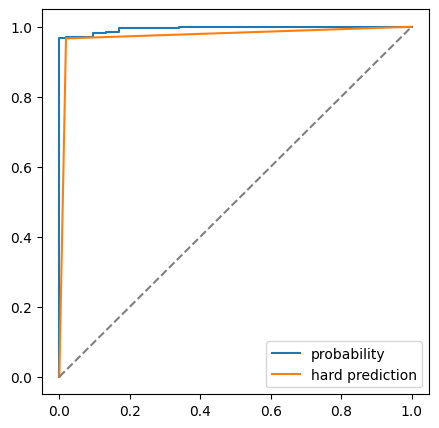

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= (5,5))
fpr, tpr, _ = roc_curve(df_y_val, y_val_pred)
plt.plot(fpr, tpr, label="probability")

fpr, tpr, _ = roc_curve(df_y_val, y_val_pred_bin)
plt.plot(fpr, tpr, label="hard prediction")

plt.plot([0,1], [0,1], color='gray', linestyle='--')

plt.legend()
plt.show()

In [36]:
# Createconfusion metrics
import numpy as np
def confusion_metrix_dataframe(y_val, y_pred):
    scores =[]
    thresholds = np.linspace(0, 1, 100)

    for t in thresholds:
        actual_positive = (y_val ==1)
        actual_negative = (y_val ==0)

        predict_positive= (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores

df_scores = confusion_metrix_dataframe(df_y_val, y_val_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.000000,211,53,0,0
10,0.101010,210,17,1,36
20,0.202020,207,5,4,48
30,0.303030,205,4,6,49
40,0.404040,205,1,6,52
50,0.505051,204,1,7,52
60,0.606061,204,1,7,52
70,0.707071,204,1,7,52
80,0.808081,204,1,7,52
90,0.909091,204,0,7,53


In [37]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores. fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores. fn)

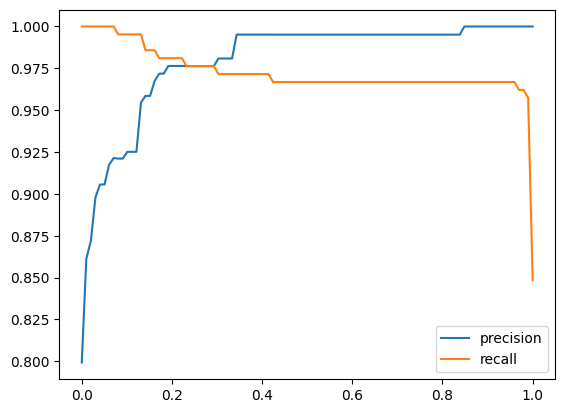

In [38]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.legend()
plt.show()

Answer for Question3: ~= 0.3

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing $F_1$:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

In [39]:
df_scores['f1'] = 2*((df_scores.p * df_scores.r) / (df_scores.p + df_scores.r))

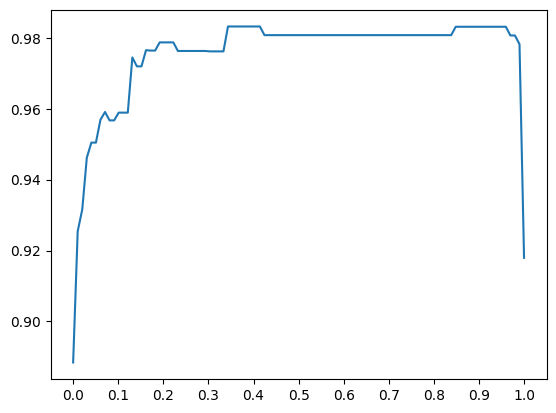

In [40]:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

Answer for Question4: ~= 0.4

## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the AUC scores across different folds?

In [41]:
# Defining Train and Predict function
columns = categorical_feature + numerical_feature
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, -1]

    return y_pred

In [43]:
# Initializing KFOLD CROSS Validation
from sklearn.model_selection import KFold

scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_X_train_full):
    df_train = df_X_train_full.iloc[train_idx]
    df_val = df_X_train_full.iloc[val_idx]

    y_train = df_train.card
    y_val = df_val.card

    dv, model = train(df_train, y_train, c=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which C leads to the best mean score?

In [45]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []
    for train_idx, val_idx in kfold.split(df_X_train_full):
        df_train = df_X_train_full.iloc[train_idx]
        df_val = df_X_train_full.iloc[val_idx]

        y_train = df_train.card
        y_val = df_val.card

        dv, model = train(df_train, y_train, c=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.996 +- 0.003
C= 0.1, 0.996 +- 0.003
C=   1, 0.996 +- 0.003
C=  10, 0.996 +- 0.003
